## Build Convolutional Neural Network (CNN) based on raw image data from Ali Express

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import pandas as pd
import numpy as np
from numpy import load

from functools import partial

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Load in the Ali Express image dataset and labels

In [ ]:
ali_image_data = load("/content/drive/MyDrive/group_project/stored_data/raw_image_data.npy")
ali_image_labels = load("/content/drive/MyDrive/group_project/stored_data/raw_image_labels.npy")

Because the Ali Express labels are words, e.g. "dress" and "trouser," we need to convert them into numbers.

There are multiple categories being labeled with the number "10" because the fashion-MNIST dataset only has labels for 0 - 9

In [ ]:
transdict = {'tshirt' : 0, 'trouser' : 1,
 'pullover' : 2,  'dress' : 3,
 'coat' : 4,     'sandal' : 5,
 'shirt' : 6,  'sneaker' : 7,
 'bag' : 8,  'boot' : 9,
 'sunglasses' : 10, 'socks' : 10,
 'belt' : 10, 'hat' : 10,
 'shorts' : 10, 'polo' : 6,
 'underwear' : 10
}

ali_cleaned_labels = np.array([ transdict[item] for item in ali_image_labels])

Now we drop the training images that correspond with label = 10

In [ ]:
drop_index = np.where(ali_cleaned_labels==10)

ali_image_data = np.delete(ali_image_data, drop_index, axis=0)
ali_cleaned_labels = np.delete(ali_cleaned_labels, drop_index, axis=0)

Pull in the fashion-MNIST training and testing dataset, perform light preprocessing to prepare data for the CNN.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

train_images = tf.image.resize(train_images, [64, 64])
test_images = tf.image.resize(test_images, [64, 64])

#train_images = np.squeeze(train_images)
#test_images = np.squeeze(test_images)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

### Build the CNN model

This model comes directly from Tensorflow documentation

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(ali_image_data, ali_cleaned_labels, epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15
1101/1101 [==============================] - 19s 7ms/step - loss: 1.5726 - accuracy: 0.4464 - val_loss: 1.8208 - val_accuracy: 0.3543
Epoch 2/15
1101/1101 [==============================] - 7s 7ms/step - loss: 1.1531 - accuracy: 0.6017 - val_loss: 1.6794 - val_accuracy: 0.4542
Epoch 3/15
1101/1101 [==============================] - 6s 6ms/step - loss: 0.9644 - accuracy: 0.6678 - val_loss: 1.7258 - val_accuracy: 0.4239
Epoch 4/15
1101/1101 [==============================] - 7s 6ms/step - loss: 0.8086 - accuracy: 0.7218 - val_loss: 2.2791 - val_accuracy: 0.3689
Epoch 5/15
1101/1101 [==============================] - 7s 6ms/step - loss: 0.6683 - accuracy: 0.7703 - val_loss: 2.7360 - val_accuracy: 0.3753
Epoch 6/15
1101/1101 [==============================] - 7s 7ms/step - loss: 0.5403 - accuracy: 0.8160 - val_loss: 3.0091 - val_accuracy: 0.3778
Epoch 7/15
1101/1101 [==============================] - 7s 6ms/step - loss: 0.4234 - accuracy: 0.8560 - val_loss: 3.5681 - val_accuracy

313/313 - 1s - loss: 7.5782 - accuracy: 0.3574 - 1s/epoch - 4ms/step


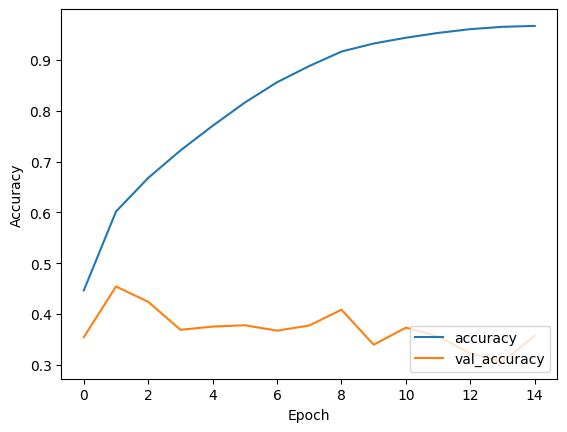

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
model.save('/content/drive/MyDrive/group_project/stored_data/cnn_2nd_raw_model.h5')

## Make Predictions

#### Predictions on the raw image training set

The accuracy is 97% because the model was trained on this data

In [ ]:
ali_train_preds = model.predict(np.expand_dims(ali_image_data, axis=-1))

1101/1101 [==============================] - 3s 3ms/step


In [ ]:
ali_train_pred_labels = np.array([np.argmax(i) for i in ali_train_preds])

In [ ]:
accuracy_score(ali_train_pred_labels, ali_cleaned_labels)

0.9746648488979778

In [ ]:
print(classification_report(ali_train_pred_labels, ali_cleaned_labels))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3464
           1       0.99      0.96      0.97      3627
           2       0.97      0.96      0.97      3567
           3       0.99      0.97      0.98      3598
           4       0.95      0.97      0.96      3460
           5       0.97      0.98      0.97      3480
           6       0.99      0.99      0.99      3458
           7       0.97      0.99      0.98      3483
           8       0.99      0.96      0.98      3629
           9       0.96      0.99      0.97      3442

    accuracy                           0.97     35208
   macro avg       0.97      0.97      0.97     35208
weighted avg       0.97      0.97      0.97     35208



In [ ]:
print(confusion_matrix(ali_train_pred_labels, ali_cleaned_labels))

[[3420    2   11    2    3    3   14    2    6    1]
 [  10 3481   16   24   21   18    2    7    2   46]
 [  26    8 3420    6   68   11    4    6    5   13]
 [   9   12   13 3477   48    8    4    4   11   12]
 [  15   11   41   11 3357    7   10    1    4    3]
 [   1    0    2    0    3 3409    1   34    3   27]
 [  21    0    5    1    5    2 3416    5    2    1]
 [   0    0    0    1    1   12    0 3441    0   28]
 [  13    5   11    5   24   44    5   17 3499    6]
 [   3    2    2    0    1   18    0   19    1 3396]]


#### Predictions on the fashion-MNIST training set

The accuracy score is only 36%. This is higher than the baseline expectation of 10% (i.e. random guessing), and is also aligned with predictions below on the fashion-MNIST testing set  

In [ ]:
mnist_train_preds = model.predict(train_images)

1875/1875 [==============================] - 4s 2ms/step


In [ ]:
mnist_train_pred_labels = np.array([np.argmax(i) for i in mnist_train_preds])

In [ ]:
accuracy_score(mnist_train_pred_labels, train_labels)

0.36061666666666664

In [ ]:
print(classification_report(mnist_train_pred_labels, train_labels))

              precision    recall  f1-score   support

           0       0.23      0.17      0.20      8248
           1       0.36      0.59      0.45      3709
           2       0.30      0.23      0.26      7819
           3       0.76      0.39      0.52     11610
           4       0.29      0.34      0.31      5038
           5       0.01      0.32      0.02       206
           6       0.15      0.20      0.17      4747
           7       0.83      0.42      0.56     11926
           8       0.23      0.37      0.28      3803
           9       0.42      0.88      0.57      2894

    accuracy                           0.36     60000
   macro avg       0.36      0.39      0.34     60000
weighted avg       0.48      0.36      0.39     60000



In [ ]:
print(confusion_matrix(mnist_train_pred_labels, train_labels))

[[1410   19 2320  180  915  587 1173   20 1413  211]
 [ 201 2186   99  366  417    9  311    1  102   17]
 [1476   19 1818  207 1737  528 1444    5  562   23]
 [1311 3397  326 4563  622   36  911    3  406   35]
 [ 501  321  648  489 1736   38 1109    1  186    9]
 [  12    2    7    7   15   66   18    4   70    5]
 [1015    4  488   92  461  465  927   17 1114  164]
 [   3    0    2    4    9 3245    7 4996  694 2966]
 [  69    6  288   85   79  853   90  914 1392   27]
 [   2   46    4    7    9  173   10   39   61 2543]]


In [ ]:
pd.DataFrame(mnist_train_pred_labels)[0].value_counts()

7    11926
3    11610
0     8248
2     7819
4     5038
6     4747
8     3803
1     3709
9     2894
5      206
Name: 0, dtype: int64

#### Predictions on the Fashion-MNIST testing dataset

The accuracy is only 36%, same as predictions made on the training dataset. This indicates that the model is consistent in a certain sense

In [ ]:
mnist_test_preds = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
mnist_test_pred_labels = np.array([np.argmax(i) for i in mnist_test_preds])

In [ ]:
accuracy_score(mnist_test_pred_labels, test_labels)

0.3574

In [ ]:
print(classification_report(mnist_test_pred_labels, test_labels))

              precision    recall  f1-score   support

           0       0.23      0.27      0.25       859
           1       0.64      0.68      0.66       943
           2       0.17      0.28      0.21       598
           3       0.18      0.69      0.28       255
           4       0.63      0.24      0.35      2633
           5       0.00      0.29      0.00         7
           6       0.26      0.22      0.24      1171
           7       0.92      0.31      0.46      2939
           8       0.27      0.51      0.36       533
           9       0.04      0.56      0.07        62

    accuracy                           0.33     10000
   macro avg       0.33      0.41      0.29     10000
weighted avg       0.58      0.33      0.38     10000



In [ ]:
print(confusion_matrix(mnist_test_pred_labels, test_labels))

[[231   8 105  77  32  98 138  59 109   2]
 [ 55 638  33 123  12   7  57   0   8  10]
 [113  11 166  73  88  11  77   0  52   7]
 [ 14  29   7 177  11   0  10   0   6   1]
 [232 299 485 398 633   2 417   0 151  16]
 [  1   0   0   1   0   2   1   1   1   0]
 [296   4 177  34 212  69 259   1 112   7]
 [ 27   2   2  18   4 757  20 915 282 912]
 [ 29   7  24  97   8  42  21  22 273  10]
 [  2   2   1   2   0  12   0   2   6  35]]


In [ ]:
pd.DataFrame(mnist_test_pred_labels)[0].value_counts(normalize=True)

7    0.1979
3    0.1845
2    0.1371
0    0.1326
4    0.0898
6    0.0789
8    0.0650
1    0.0623
9    0.0471
5    0.0048
Name: 0, dtype: float64

#### Load saved convolutional NN model

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/ADS_504_machine_learning/group_project/stored_data/cnn_2nd_raw_model.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

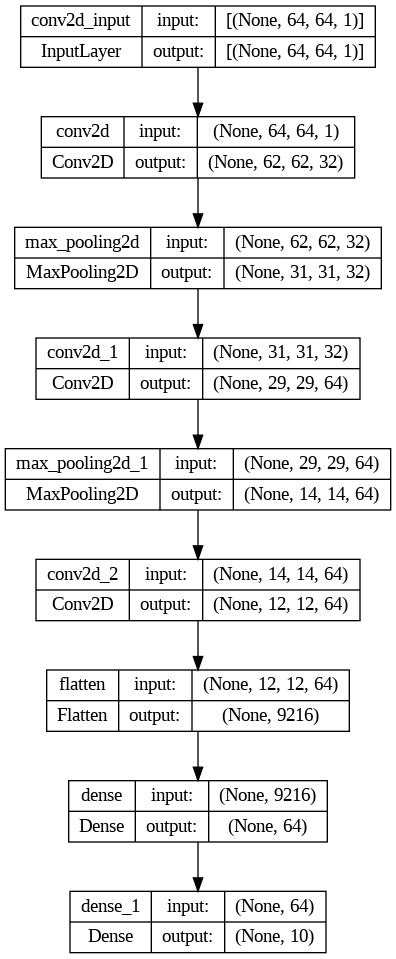

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)